1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [2]:
import numpy.random as npr
import numpy as np
from scipy.stats import norm
from scipy import linalg as la
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)
npr.seed(320)

In [3]:
#data generation
N=5000

x1 = npr.normal(0,1,(N,))
x2 = x1+npr.normal(0,3,(N,))
x3 = 2*x1+x2

data = np.array([x1, x2, x3])
cov = np.cov(data)
print("Covariance matrix")
print(cov)
print()

print("Let's diagonalize it")
print("det: ", la.det(cov))
l, V = la.eig(cov)
l = np.real_if_close(l)
print("Eigen values: ", l)
print("Diagonalization matrix: ")
print(V)

Covariance matrix
[[ 0.998  1.042  3.039]
 [ 1.042 10.237 12.322]
 [ 3.039 12.322 18.4  ]]

Let's diagonalize it
det:  1.2168375037180177e-13
Eigen values:  [2.765e+01 2.388e-15 1.982e+00]
Diagonalization matrix: 
[[-0.115 -0.816  0.566]
 [-0.578 -0.408 -0.706]
 [-0.808  0.408  0.425]]


In [29]:
print("Performing the svd")
#D = U*spectrum*Vt
U, spectrum, Vt = la.svd(data)

l_SVD = spectrum**2/(N-1)
print("l: ")
print(l_SVD)
print("Diagonalization matrix: ")
print(U)

Performing the svd
l: 
[2.765e+01 1.985e+00 2.374e-30]
Diagonalization matrix: 
[[-0.115  0.566 -0.816]
 [-0.578 -0.706 -0.408]
 [-0.808  0.425  0.408]]


We can observe that they lead to comparable results

In [5]:
#https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
print("Performing the principal component analysis")
# sort by eigenvalues
indeces = np.flip(np.argsort(l))
l = l[indeces]
V = V[:, indeces]

print("Diagonal matrix: ")
Lambda=np.diag(l)
trace = np.trace(Lambda)
print (Lambda)
print()
print("Check the variability of the dataset associated to each eigenvalue")
for i, eigen in enumerate(l):
    print(f"{i}) : {eigen/trace*100:.2f}%")

Performing the principal component analysis
Diagonal matrix: 
[[2.765e+01 0.000e+00 0.000e+00]
 [0.000e+00 1.982e+00 0.000e+00]
 [0.000e+00 0.000e+00 2.388e-15]]

Check the variability of the dataset associated to each eigenvalue
0) : 93.31%
1) : 6.69%
2) : 0.00%


Acccording to the PCA, we can reduce the dimensionality discarding the second eigenvalue of the covariance matrix.

This is reasonable, since x3 is completely dipendent on x1 and x2.

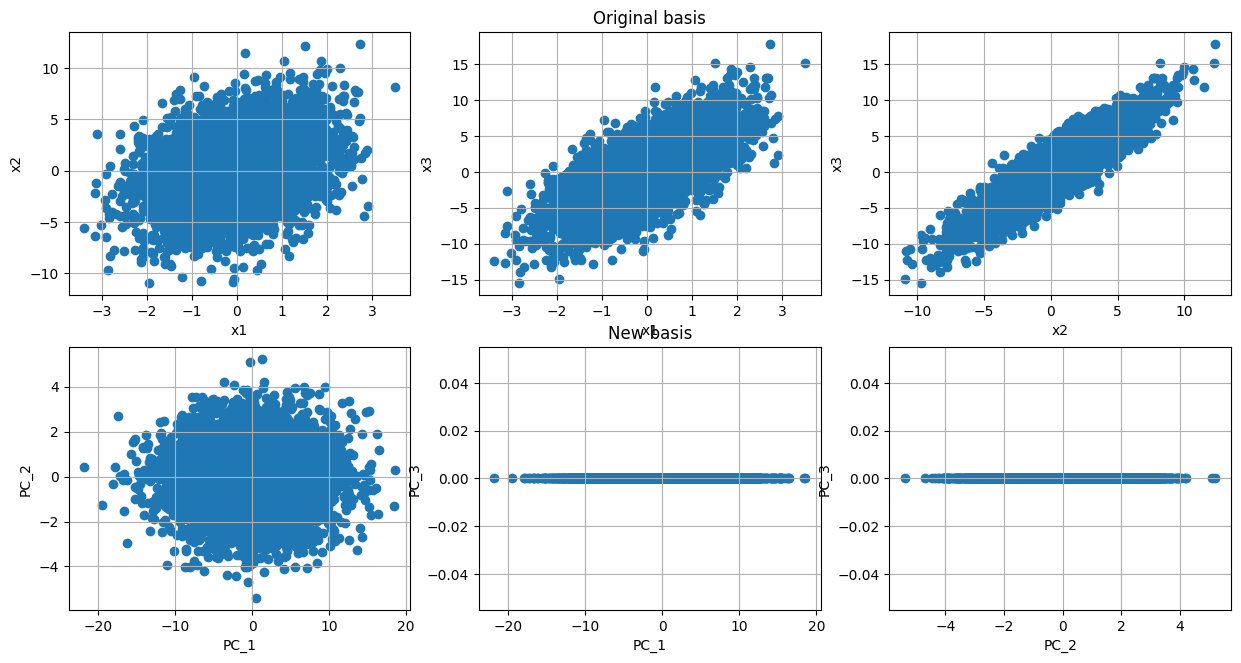

In [33]:
#let's build the projection matrix
W = V[:, :-1]
pca_data = np.dot(data.T, W)

#add the third component = 0
pca_data = np.hstack((pca_data, np.zeros(shape=(N,1)))).T

fig, ax = plt.subplots(2, 3, figsize = (15, 7.5))
ax[0,1].set_title("Original basis")
ax[1,1].set_title("New basis")

var = ["x1", "x2", "x3"]
var_PCA = ["PC_1", "PC_2", "PC_3"]

pairs = [(x, y) for y in range(1, len(var)) for x in range(y)]

x_plot = [data, pca_data]
label_plot = [var, var_PCA]

#plot 
for row in [0,1]:
    for col, (x, y) in enumerate(pairs):
        ax[row, col].scatter(x_plot[row][x, :], x_plot[row][y, :])
        ax[row, col].set_xlabel(label_plot[row][x])
        ax[row, col].set_ylabel(label_plot[row][y])
        ax[row, col].grid()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [6]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

--2024-01-22 14:08:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.


HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/home/ema/data/magic04.data.5’

magic04.data.5          [           <=>      ]   1,41M   703KB/s    in 2,1s    

2024-01-22 14:08:19 (703 KB/s) - ‘/home/ema/data/magic04.data.5’ saved [1477391]

--2024-01-22 14:08:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/home/ema/data/magic04.names.5’

magic04.names.5         [ <=>                ]   5,27K  --.-KB/s    in 0s      

2024-01-22 14:08:20 (22,6 MB/s) - ‘/home/ema/data/magic04.names.5’ saved [5400]

